<a href="https://colab.research.google.com/github/icarocarmona/pos-tech-dtat/blob/main/f2_ml_and_time_series/ml_with_python/AULA_2_ANALISE_EXPLORAT%C3%93RIA_DE_DADOS_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
df = pd.read_excel("https://github.com/FIAP/Pos_Tech_DTAT/raw/61a634996879d5c1384af6f567e29659ad68b727/Aula%2003/Base%20de%20Dados/dataset_rolling_stones.xlsx")
df.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.0,0.1470,32,305880
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.0,0.2060,32,305106


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1610 non-null   object        
 1   album             1610 non-null   object        
 2   release_date      1610 non-null   datetime64[ns]
 3   track_number      1610 non-null   int64         
 4   acousticness      1610 non-null   float64       
 5   danceability      1610 non-null   float64       
 6   energy            1610 non-null   float64       
 7   instrumentalness  1610 non-null   float64       
 8   liveness          1610 non-null   float64       
 9   loudness          1610 non-null   float64       
 10  speechiness       1610 non-null   float64       
 11  tempo             1610 non-null   float64       
 12  valence           1610 non-null   float64       
 13  popularity        1610 non-null   int64         
 14  duration_ms       1610 n

In [4]:
df.shape

(1610, 15)

In [5]:
print("Data Inicial: ", df['release_date'].min())

Data Inicial:  1964-04-16 00:00:00


In [6]:
print("Data Final: ", df['release_date'].max())

Data Final:  2022-06-10 00:00:00


In [7]:
df.isnull().sum()

name                0
album               0
release_date        0
track_number        0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1605    False
1606    False
1607    False
1608    False
1609    False
Length: 1610, dtype: bool

In [9]:
df[df.duplicated()]

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
928,Some Girls - Remastered,Some Girls (Deluxe Version),1978-06-09,4,0.5270,0.474,0.938,0.520000,0.299,-2643.0,0.0898,71995.00,0.505,21,276933
929,Lies - Remastered,Some Girls (Deluxe Version),1978-06-09,5,0.4370,0.382,0.997,0.950000,0.617,-1568.0,0.1880,162428.00,0.563,16,191266
935,Claudine,Some Girls (Deluxe Version),1978-06-09,1,0.0144,0.439,0.977,0.022100,0.383,-4386.0,0.1280,105124.00,0.364,17,222253
939,No Spare Parts,Some Girls (Deluxe Version),1978-06-09,5,0.2400,0.594,0.762,0.000015,0.712,-5145.0,0.0292,72648.00,0.540,19,270466
940,Don't Be A Stranger,Some Girls (Deluxe Version),1978-06-09,6,0.0610,0.720,0.867,0.029700,0.385,-5871.0,0.0390,127329.00,0.847,15,246266
946,Petrol Blues,Some Girls (Deluxe Version),1978-06-09,12,0.7690,0.835,0.621,0.114000,0.116,-8007.0,0.0406,115.87,0.336,13,95626


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


<Axes: xlabel='ano', ylabel='quantidade'>

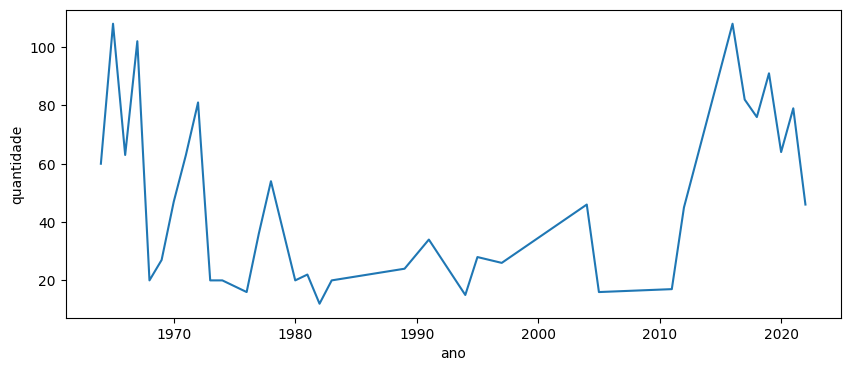

In [11]:
df['ano'] = df['release_date'].dt.year

# Criar um novo DataFrame agrupando por ano e contando as ocorrências
novo_df = df.groupby('ano').size().reset_index(name='quantidade')

plt.figure(figsize=(10,4))
# Exibir o novo DataFrame
sns.lineplot(novo_df, x = "ano", y="quantidade")

In [12]:
df.describe()

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,ano
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6406.640075,0.069512,114078.725261,0.582165,20.788199,257736.488199,1991.745963
std,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,3474.285941,0.051631,46196.602233,0.231253,12.426859,108333.474920,22.440296
min,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24408.000000,0.023200,65.990000,0.000000,0.000000,21000.000000,1964.000000
25%,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8829.500000,0.036500,98996.500000,0.404250,13.000000,190613.000000,1970.000000
50%,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6179.000000,0.051200,120319.000000,0.583000,20.000000,243093.000000,1986.000000
75%,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4254.750000,0.086600,140853.750000,0.778000,27.000000,295319.750000,2017.000000
max,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-2.310000,0.624000,216304.000000,0.974000,80.000000,981866.000000,2022.000000


In [13]:
df['duration_min'] = df['duration_ms'] / 60000

In [14]:
df.describe()

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,ano,duration_min
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6406.640075,0.069512,114078.725261,0.582165,20.788199,257736.488199,1991.745963,4.295608
std,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,3474.285941,0.051631,46196.602233,0.231253,12.426859,108333.474920,22.440296,1.805558
min,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24408.000000,0.023200,65.990000,0.000000,0.000000,21000.000000,1964.000000,0.350000
25%,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8829.500000,0.036500,98996.500000,0.404250,13.000000,190613.000000,1970.000000,3.176883
50%,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6179.000000,0.051200,120319.000000,0.583000,20.000000,243093.000000,1986.000000,4.051550
75%,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4254.750000,0.086600,140853.750000,0.778000,27.000000,295319.750000,2017.000000,4.921996
max,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-2.310000,0.624000,216304.000000,0.974000,80.000000,981866.000000,2022.000000,16.364433


In [15]:
df.groupby('album')['duration_min'].mean()

album
12 X 5                              2.682068
12 x 5                              2.682772
A Bigger Bang (2009 Re-Mastered)    4.016356
A Bigger Bang (Live)                5.176630
Aftermath                           3.899185
                                      ...   
Undercover                          4.492750
Undercover (2009 Re-Mastered)       4.497595
Voodoo Lounge (Remastered 2009)     4.118779
Voodoo Lounge Uncut (Live)          5.248507
got LIVE if you want it!            2.762532
Name: duration_min, Length: 90, dtype: float64

In [16]:
import matplotlib.pyplot as plt

In [17]:
df_grupados_duracao = df.groupby('album')['duration_min'].mean().sort_values(ascending=False)
df_grupados_duracao.head(5)

album
Havana Moon (Live)                 6.632819
Bridges To Bremen (Live)           6.332265
Jamming With Edward                6.042794
Live At The Checkerboard Lounge    6.009647
Totally Stripped - Paris (Live)    5.947430
Name: duration_min, dtype: float64

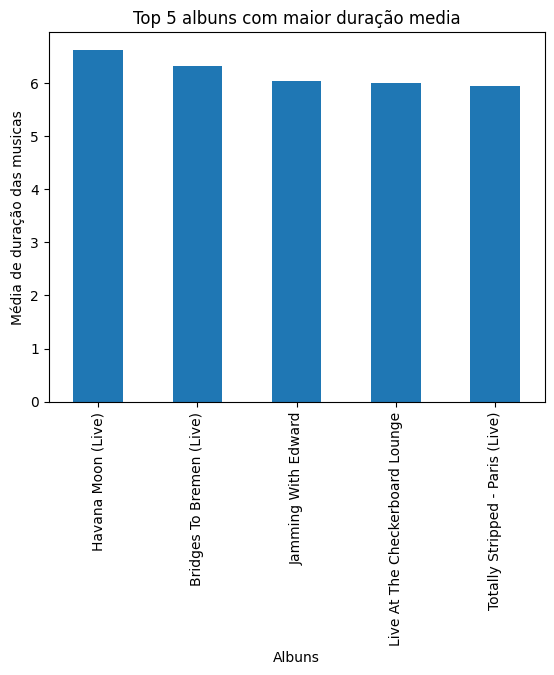

In [18]:
df_grupados_duracao.head(5).plot(kind='bar')

plt.xlabel('Albuns')
plt.ylabel('Média de duração das musicas')
plt.title('Top 5 albuns com maior duração media')



plt.show()

In [19]:
top_albuns = df['album'].value_counts().head(10)

Text(0.5, 1.0, 'Top 10 Álbuns')

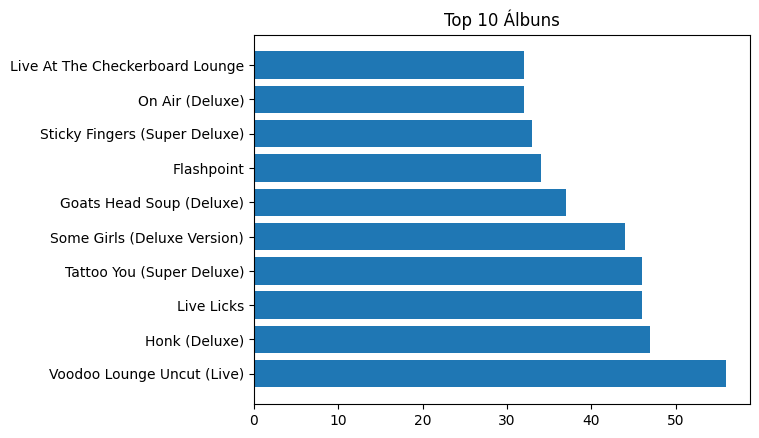

In [20]:
plt.barh(top_albuns.index, top_albuns.values)

plt.title('Top 10 Álbuns')

In [21]:
df_ultima_decada = df[df["release_date"].between(pd.to_datetime("2013"), pd.to_datetime("2023"))]

In [22]:
df_por_album = df_ultima_decada.groupby("album")["popularity"].sum().sort_values(ascending=False).head(10)
total_popularity = df_por_album.sum()
df_pct = df_por_album / total_popularity * 100

labels = df_pct.index.tolist()
sizes = df_pct.values.tolist()

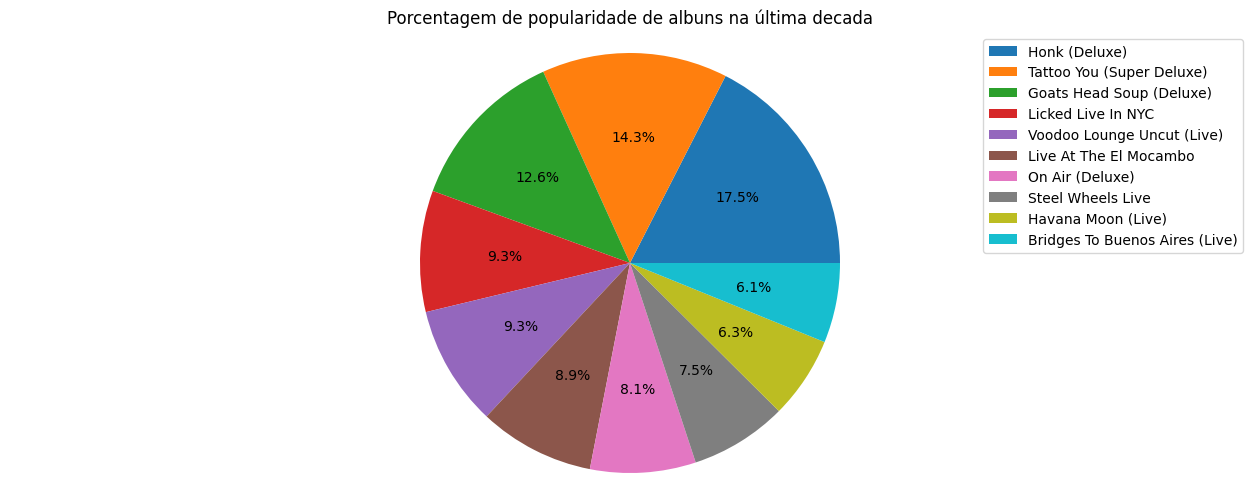

In [23]:
fig, ax = plt.subplots(figsize=(16,6))
ax.pie(sizes, autopct="%1.1f%%")
ax.axis('equal')
plt.title('Porcentagem de popularidade de albuns na última decada')
plt.legend(labels, loc="best")

plt.show()

# Outliers

In [24]:
import seaborn as sns

In [25]:
sns.set(style="whitegrid")

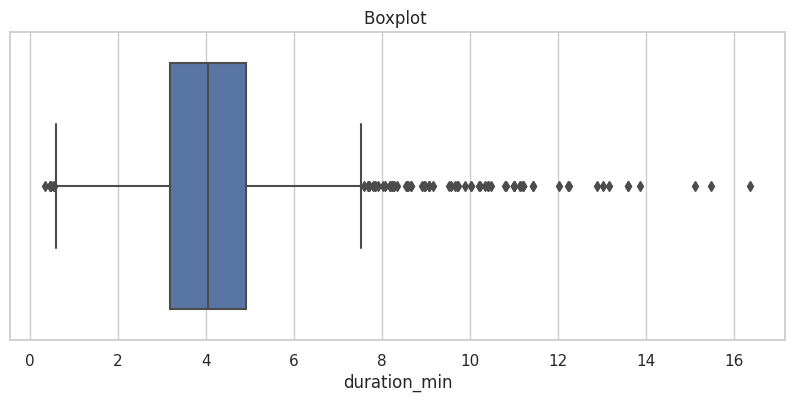

In [26]:
fig, axes = plt.subplots(figsize=(10,4))
sns.boxplot(data=df ,x="duration_min")
axes.set_title("Boxplot ")

plt.show()

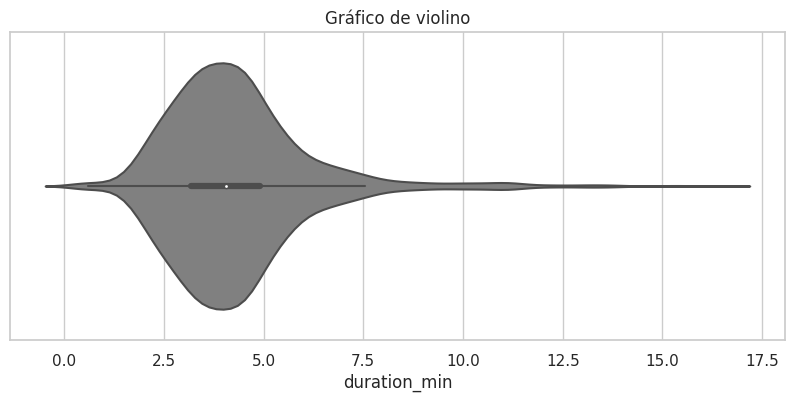

In [27]:
fig, axes = plt.subplots(figsize=(10,4))
sns.violinplot(x="duration_min",data=df, color="gray")

axes.set_title("Gráfico de violino")
plt.show()

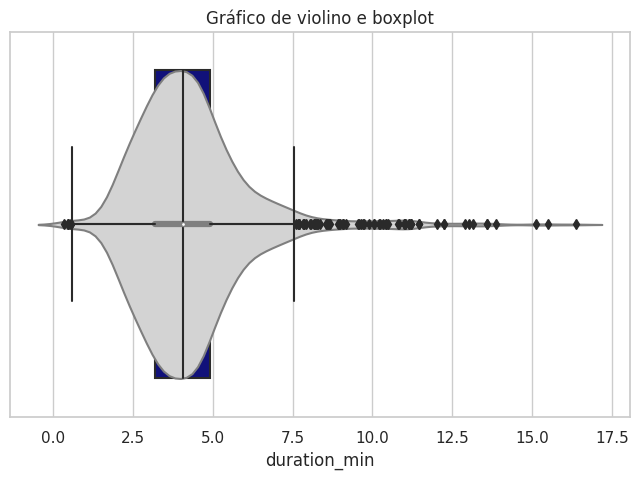

In [28]:
fig, ax = plt.subplots(figsize=(8,5))

sns.violinplot(x="duration_min",data=df,ax=ax, color="lightgray")
sns.boxplot(x="duration_min", data=df, ax=ax, whis=1.5, color="darkblue")

ax.set_title("Gráfico de violino e boxplot")


plt.show()

In [29]:
df.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,ano,duration_min
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640,2022,0.810667
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173,2022,4.219550
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160,2022,4.386000
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.0,0.1470,32,305880,2022,5.098000
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.0,0.2060,32,305106,2022,5.085100


In [30]:
def classifica_musica_ao_vivo(df):
  return df['liveness'] >= 0.8

In [31]:
df['ao_vivo'] = df.apply(classifica_musica_ao_vivo, axis=1)

In [32]:
df.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,ano,duration_min,ao_vivo
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640,2022,0.810667,True
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173,2022,4.219550,True
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160,2022,4.386000,True
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.0,0.1470,32,305880,2022,5.098000,True
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.0,0.2060,32,305106,2022,5.085100,True


In [33]:
df.groupby("ao_vivo")["ao_vivo"].count()

ao_vivo
False    1112
True      498
Name: ao_vivo, dtype: int64

In [34]:
df_gravado_em_estudio = df[df['ao_vivo'] == False]
df_show_ao_vivo = df[df['ao_vivo'] == True]


In [35]:
print("Média das muúsicas ao vivo: ", df_show_ao_vivo["duration_min"].mean())

Média das muúsicas ao vivo:  5.088648962516734


In [36]:
print("Média das muúsicas em studio: ", df_gravado_em_estudio["duration_min"].mean())

Média das muúsicas em studio:  3.940451363908873


In [37]:
df_studio = df_gravado_em_estudio.groupby("album")["loudness"].sum()
df_ao_vivo = df_show_ao_vivo.groupby("album")["loudness"].sum()

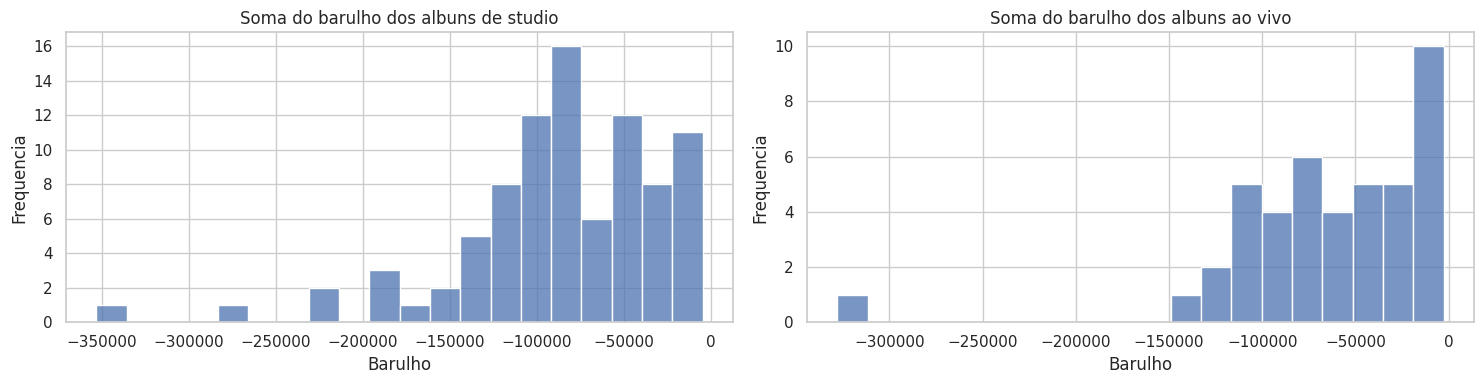

In [38]:
fig , axes = plt.subplots(1,2, figsize=(15,4))

sns.histplot(data=df_studio, bins=20, ax=axes[0])
axes[0].set_title("Soma do barulho dos albuns de studio")
axes[0].set_xlabel("Barulho")
axes[0].set_ylabel("Frequencia")

sns.histplot(data=df_ao_vivo, bins=20, ax=axes[1])
axes[1].set_title("Soma do barulho dos albuns ao vivo")
axes[1].set_xlabel("Barulho")
axes[1].set_ylabel("Frequencia")

fig.tight_layout()
plt.show()

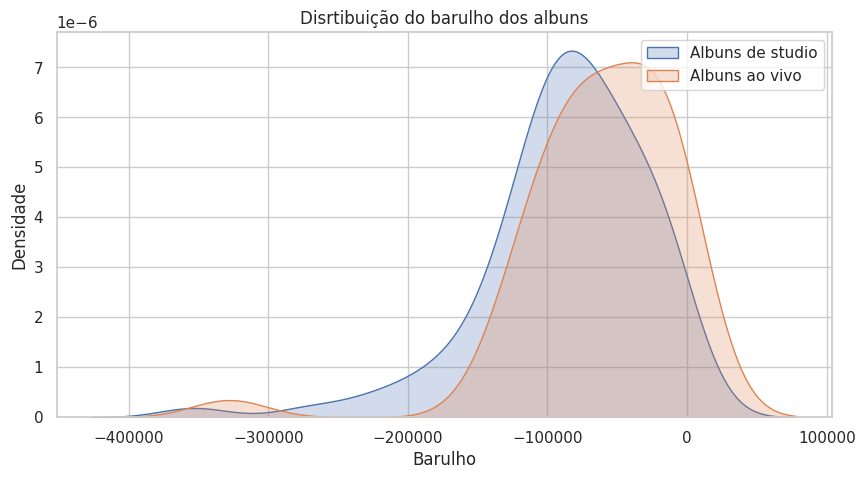

In [39]:
plt.figure(figsize=(10,5))

sns.kdeplot(data=df_studio, label="Albuns de studio", fill=True)
sns.kdeplot(data=df_ao_vivo, label="Albuns ao vivo", fill=True)

plt.title("Disrtibuição do barulho dos albuns")
plt.xlabel("Barulho")
plt.ylabel("Densidade")
plt.legend()


In [40]:
from scipy.stats import shapiro

In [41]:
def teste_de_hipotese(df):
  stat, p = shapiro(df)
  print("Soma do barulho dos albuns de studio:" )
  print("Estatísticas de teste: {:.4f}, valor p: {}".format(stat, p))

  if (p > 0.05):
    print("Não há eidencia suficiente para rejeitar a hipótese de normalidade")
  else:
    print("A hipótese de normalidade é rejeitada")

In [42]:
teste_de_hipotese(df_studio)

Soma do barulho dos albuns de studio:
Estatísticas de teste: 0.8958, valor p: 3.2961095257633133e-06
A hipótese de normalidade é rejeitada


In [43]:
teste_de_hipotese(df_ao_vivo)

Soma do barulho dos albuns de studio:
Estatísticas de teste: 0.7913, valor p: 2.35057973441144e-06
A hipótese de normalidade é rejeitada


In [44]:
from scipy.stats import mannwhitneyu

In [45]:
stat , p = mannwhitneyu(df_studio.sample(len(df_studio)), df_ao_vivo.sample(len(df_ao_vivo)), alternative="less")

print("Estatística de teste U:", stat)
print("Valor p: ", p)

alpha = 0.05
if p < alpha:
  print("Diferença estatisticamente significante")
else:
  print("Não há diferença estatisticamente significante")

Estatística de teste U: 1367.0
Valor p:  0.0050727361177996585
Diferença estatisticamente significante


## Correlação

In [47]:
media_por_album = df.groupby("album")["valence"].mean().reset_index()

media_por_album = media_por_album.rename(columns={"valence":"media_valence"})

media_por_album["sentimento"] = ["positivo" if v > 0.6 else "negativo" for v in media_por_album["media_valence"]]

print(media_por_album.groupby("sentimento")["sentimento"].count())

sentimento
negativo    38
positivo    52
Name: sentimento, dtype: int64


In [ ]:
media_por_album.head(2)

In [ ]:
df_resultado_final = pd.merge(df, media_por_album, on = "album")

In [ ]:
matriz_correlacao = df_resultado_final.corr()

correlacao_sentimento = matriz_correlacao["media_valence"]

display(correlacao_sentimento)

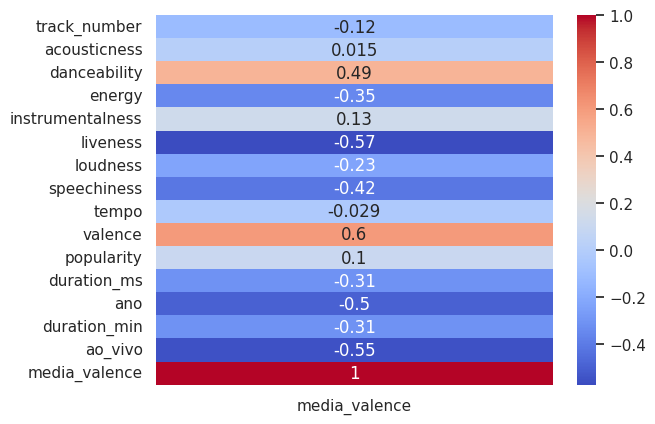

In [59]:
sns.heatmap(data=correlacao_sentimento.to_frame(), annot=True, cmap="coolwarm")
plt.show()

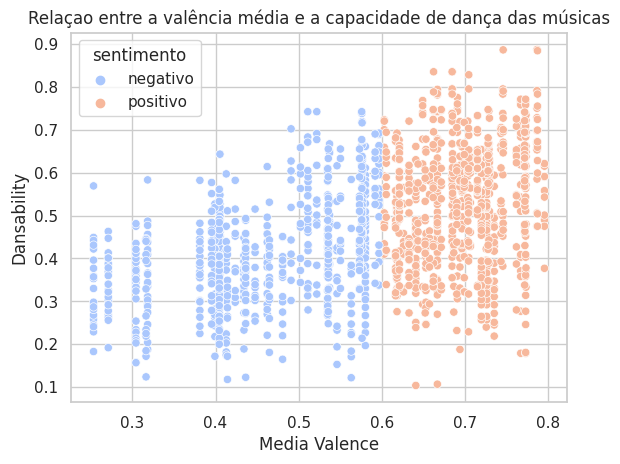

In [62]:
sns.scatterplot(data=df_resultado_final, x="media_valence", y="danceability",  hue= "sentimento", palette="coolwarm")

plt.xlabel("Media Valence")
plt.ylabel("Dansability")
plt.title("Relaçao entre a valência média e a capacidade de dança das músicas")
plt.show()

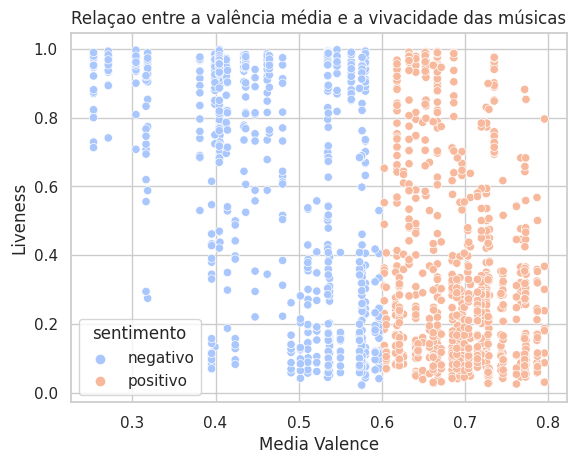

In [64]:
sns.scatterplot(data=df_resultado_final, x="media_valence", y="liveness",  hue= "sentimento", palette="coolwarm")

plt.xlabel("Media Valence")
plt.ylabel("Liveness")
plt.title("Relaçao entre a valência média e a vivacidade das músicas")
plt.show()